# Poisson's Equation

* $\nabla ^2 \phi = -\rho$

- Index: 3502422
- Reference: 20916691

Text(0.5, 1.08, 'Discrete Grid $\\Omega_h,$ h= 0.1')

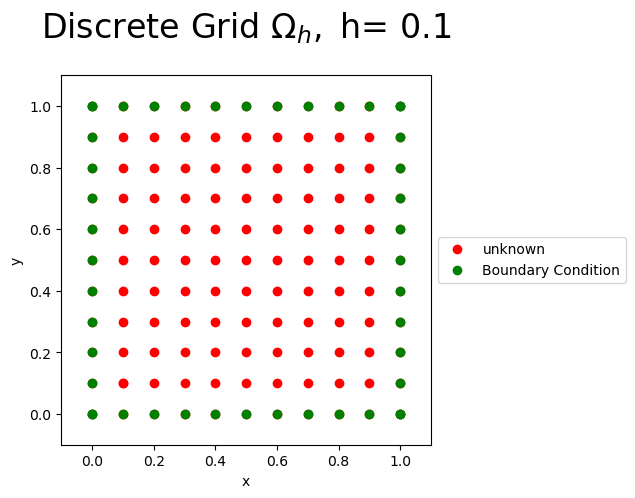

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

N = 10
h = 1/N
x = np.arange(0,1.0001,h)
y=np.arange(0,1.0001,h)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
plt.plot(x[1],y[1],'ro',label='unknown')
plt.plot(X,Y,'ro')
plt.plot(np.ones(N+1),y,'go',label='Boundary Condition')
plt.plot(np.zeros(N+1),y,'go')
plt.plot(x,np.zeros(N+1),'go')
plt.plot(x, np.ones(N+1),'go')
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $\Omega_h,$ h= %s'%(h),fontsize=24,y=1.08)
#plt.show()


<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_3440/2498679596.py:19: SyntaxWarning: invalid escape sequence '\p'
  ax.set_zlabel('$\phi$')


Text(0.5, 0.9936000000000001, 'Boundary Values')

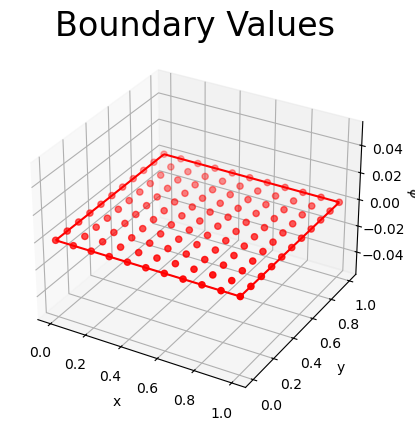

In [ ]:
w=np.zeros((N+1,N+1)) # note that w is the potential

for i in range (0,N):
        w[i,0]=0 
        w[i,N]=0 

for j in range (0,N):
        w[0,j]=0 
        w[N,j]=0 

        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, w,color='r', rstride=10, cstride=10)
ax.scatter(X, Y, w, color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\phi$')
plt.title(r'Boundary Values',fontsize=24,y=1.08)


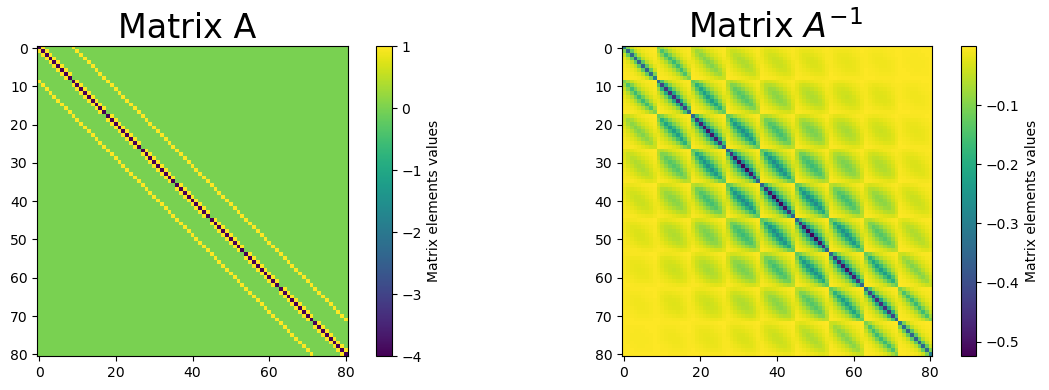

In [ ]:
N2=(N-1)*(N-1)
A=np.zeros((N2,N2))
## Diagonal            
for i in range (0,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j]=-4

# LOWER DIAGONAL        
for i in range (1,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j-1]=1   
# UPPPER DIAGONAL        
for i in range (0,N-2):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j+1]=1   

# LOWER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (1,N-1):           
        A[i+(N-1)*j,i+(N-1)*(j-1)]=1        
        
        
# UPPER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (0,N-2):           
        A[i+(N-1)*j,i+(N-1)*(j+1)]=1
Ainv=np.linalg.inv(A)   
fig = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(A,interpolation='none')
clb=plt.colorbar();
clb.set_label('Matrix elements values')
plt.title('Matrix A ',fontsize=24)
plt.subplot(122)
plt.imshow(Ainv,interpolation='none')
clb=plt.colorbar();
clb.set_label('Matrix elements values')
plt.title(r'Matrix $A^{-1}$ ',fontsize=24)

fig.tight_layout()


In [ ]:
r=np.zeros(N2)

# vector r      
for i in range (0,N-1):
    for j in range (0,N-1):           
        r[i+(N-1)*j]=h*h*(x[i]*x[i]+y[j]*y[j])     
# Boundary        
b_bottom_top=np.zeros(N2)
for i in range (0,N-1):
    b_bottom_top[i]=0 
    b_bottom_top[i+(N-1)*(N-2)]=0
      
b_left_right=np.zeros(N2)
for j in range (0,N-1):
    b_left_right[(N-1)*j]=0 
    b_left_right[N-2+(N-1)*j]=0
    
b=b_left_right+b_bottom_top

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_3440/4113697657.py:12: SyntaxWarning: invalid escape sequence '\p'
  ax.set_zlabel('$\phi$')


Text(0.5, 0.9936000000000001, 'Numerical Approximation of the Poisson Equation')

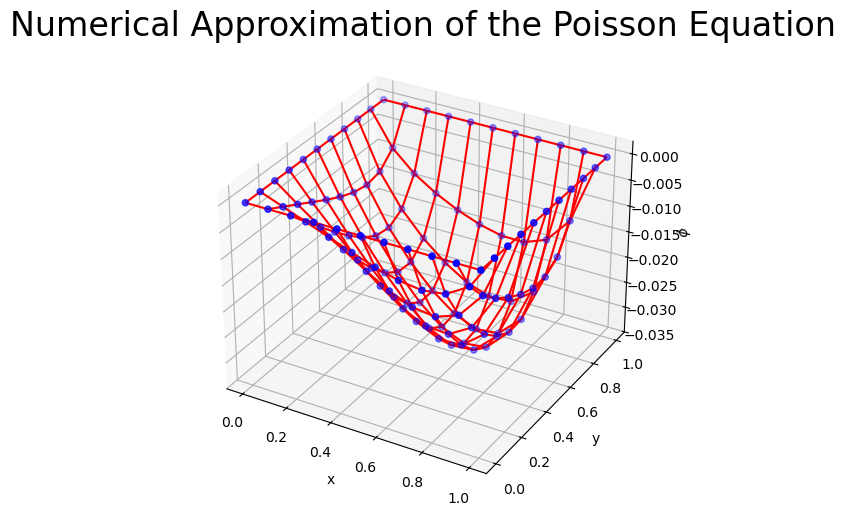

In [110]:
C=np.dot(Ainv,r-b)
w[1:N,1:N]=C.reshape((N-1,N-1))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, w,color='r');

ax.scatter(X,Y,w,c='b')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\phi$')
plt.title(r'Numerical Approximation of the Poisson Equation',fontsize=24,y=1.08)


# Shrodinger's Equation

In [96]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [97]:
def Vpot(x):
    return x**2

In [98]:
a = -8
b = 8
N = 1001

In [99]:
x = np.linspace(a,b,N)
h = x[1]-x[0]

T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0

In [100]:
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0

In [101]:
H = -T/(2*h**2) + V

val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:4]
energies=(val[z]/val[z][0])
print(energies)

[1.         2.99995474 4.99981896 6.99959265]


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_3440/1008188010.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\psi$(x)',size=14)


Text(0.5, 1.0, 'normalized wavefunctions for a harmonic oscillator using finite difference method')

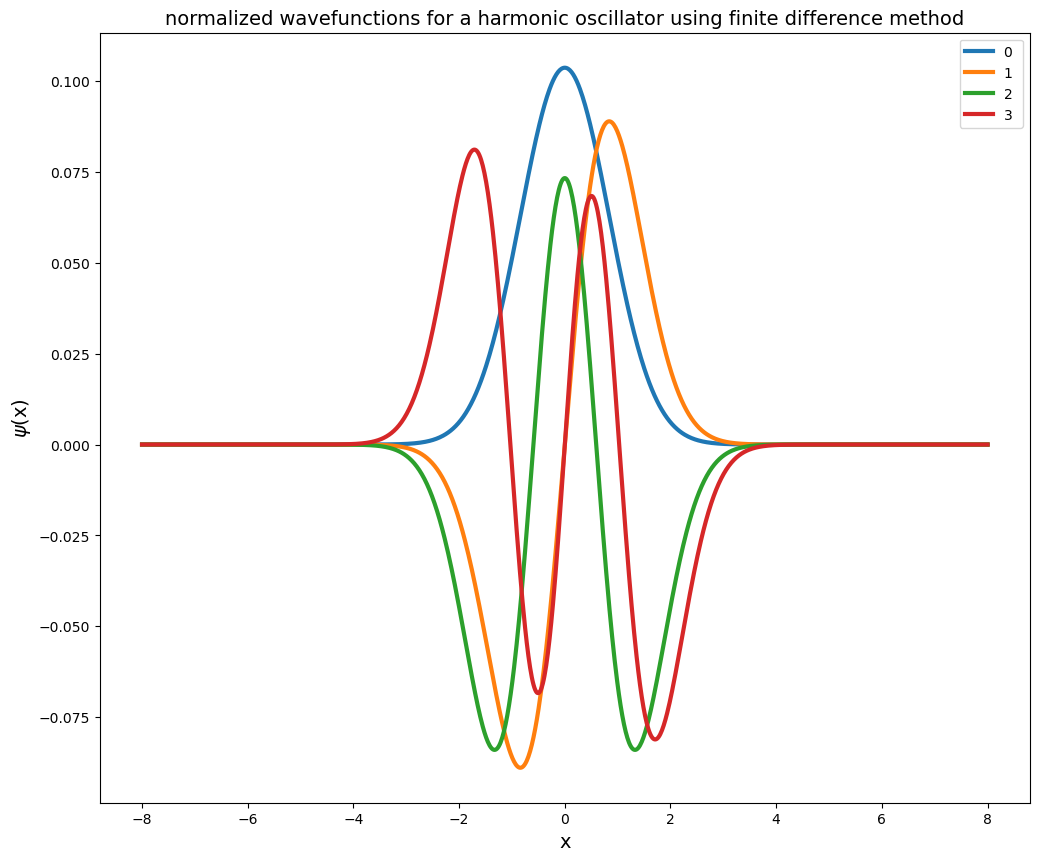

In [102]:
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a harmonic oscillator using finite difference method',size=14)
